In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
df = pd.read_csv('kashmiriwazwaan_merge.txt',sep = '\t',names =['contents'])

In [3]:
df.head()

,contents
0,contents
1,Here's A Mouth Watering Guide To Kashmiri Wazw...
2,"Wazwan | District Budgam , Government of Jammu..."
3,Inside Wazwan - 36-Dish Multi-Course Royal Mea...
4,Kashmiri Wazwan: 10 Dishes That Come in Wazwan


In [5]:
df.drop(labels=0,axis = 0,inplace = True)

In [6]:
df.head()

,contents
1,Here's A Mouth Watering Guide To Kashmiri Wazw...
2,"Wazwan | District Budgam , Government of Jammu..."
3,Inside Wazwan - 36-Dish Multi-Course Royal Mea...
4,Kashmiri Wazwan: 10 Dishes That Come in Wazwan
5,“Kashmiri Wazwan” Review of Mughal Darbar - Tr...


In [7]:
!pip install neattext

     |████████████████████████████████| 114 kB 5.1 MB/s 


In [8]:
#Load text cleaning package
import neattext.functions as nfx

In [9]:
df['contents'].apply(nfx.extract_hashtags)

1                                   []
2                                   []
3                                   []
4                                   []
5                                   []
                    ...               
362                 [#kashmiriwazwan']
363    [#JeeAaiyanNu, #KashmiriWazwan]
364              [#KashmiriWazwan...']
365                 [#kashmiriwazwan']
366                  [#KashmiriWazwan]
Name: contents, Length: 366, dtype: object

In [10]:
#Cleaning hashtags
df['extracted_hashtags']=df['contents'].apply(nfx.extract_hashtags)

In [11]:
df[['extracted_hashtags','contents']]

,extracted_hashtags,contents
1,[],Here's A Mouth Watering Guide To Kashmiri Wazw...
2,[],"Wazwan | District Budgam , Government of Jammu..."
3,[],Inside Wazwan - 36-Dish Multi-Course Royal Mea...
4,[],Kashmiri Wazwan: 10 Dishes That Come in Wazwan
5,[],“Kashmiri Wazwan” Review of Mughal Darbar - Tr...
...,...,...
362,[#kashmiriwazwan'],"297201691130994688,2013-02-01 04:36:19+00:00,'..."
363,"[#JeeAaiyanNu, #KashmiriWazwan]","282314909289689089,2012-12-22 02:41:34+00:00,'..."
364,[#KashmiriWazwan...'],"127458626360188929,2011-10-21 18:57:59+00:00,'..."
365,[#kashmiriwazwan'],"112450942930124800,2011-09-10 09:02:48+00:00,'..."


In [13]:
df['clean_contents']= df['contents'].apply(lambda x: nfx.remove_userhandles(x))

In [15]:
df[['contents','clean_contents']]

,contents,clean_contents
1,Here's A Mouth Watering Guide To Kashmiri Wazw...,Here's A Mouth Watering Guide To Kashmiri Wazw...
2,"Wazwan | District Budgam , Government of Jammu...","Wazwan | District Budgam , Government of Jammu..."
3,Inside Wazwan - 36-Dish Multi-Course Royal Mea...,Inside Wazwan - 36-Dish Multi-Course Royal Mea...
4,Kashmiri Wazwan: 10 Dishes That Come in Wazwan,Kashmiri Wazwan: 10 Dishes That Come in Wazwan
5,“Kashmiri Wazwan” Review of Mughal Darbar - Tr...,“Kashmiri Wazwan” Review of Mughal Darbar - Tr...
...,...,...
362,"297201691130994688,2013-02-01 04:36:19+00:00,'...","297201691130994688,2013-02-01 04:36:19+00:00,'..."
363,"282314909289689089,2012-12-22 02:41:34+00:00,'...","282314909289689089,2012-12-22 02:41:34+00:00,'..."
364,"127458626360188929,2011-10-21 18:57:59+00:00,'...","127458626360188929,2011-10-21 18:57:59+00:00,'..."
365,"112450942930124800,2011-09-10 09:02:48+00:00,'...","112450942930124800,2011-09-10 09:02:48+00:00,'..."


In [18]:
df['clean_contents'].iloc[313]

"1007846870104920064,2018-06-16 04:46:33+00:00,'#EIDMUBARAK from all of us at ABChapri Retreats, come and Join us at Sukoon Houseboat for Eid celebration with homemade Kashmiri sweets by Chef Deepak Rai and Kashmiri Wazwan feast by Amin Zaroo.\\n#EidFestival #EidCelebration #Sufilife #HimalayanEscape #KashmiriWazwan #Sukoon https://t.co/VKVppNeqWI'"

In [19]:
#Cleaning Tweets :Remove Multiple white spaces
df['clean_contents'] = df['clean_contents'].apply(nfx.remove_multiple_spaces)

In [20]:
df['clean_contents'].iloc[313]

"1007846870104920064,2018-06-16 04:46:33+00:00,'#EIDMUBARAK from all of us at ABChapri Retreats, come and Join us at Sukoon Houseboat for Eid celebration with homemade Kashmiri sweets by Chef Deepak Rai and Kashmiri Wazwan feast by Amin Zaroo.\\n#EidFestival #EidCelebration #Sufilife #HimalayanEscape #KashmiriWazwan #Sukoon https://t.co/VKVppNeqWI'"

In [21]:
#Cleaning Tweets : Remove urls
df['clean_contents'] = df['clean_contents'].apply(nfx.remove_urls)

In [22]:
df['clean_contents'].iloc[313]

"1007846870104920064,2018-06-16 04:46:33+00:00,'#EIDMUBARAK from all of us at ABChapri Retreats, come and Join us at Sukoon Houseboat for Eid celebration with homemade Kashmiri sweets by Chef Deepak Rai and Kashmiri Wazwan feast by Amin Zaroo.\\n#EidFestival #EidCelebration #Sufilife #HimalayanEscape #KashmiriWazwan #Sukoon "

In [23]:
#Cleaning Tweets: Punctuations
df['clean_contents'] = df['clean_contents'].apply(nfx.remove_puncts)

In [24]:
df['clean_contents'].iloc[313]

'100784687010492006420180616 04:46:33+00:00#EIDMUBARAK from all of us at ABChapri Retreats come and Join us at Sukoon Houseboat for Eid celebration with homemade Kashmiri sweets by Chef Deepak Rai and Kashmiri Wazwan feast by Amin Zaroo\\n#EidFestival #EidCelebration #Sufilife #HimalayanEscape #KashmiriWazwan #Sukoon '

In [25]:
#Remove emojis
df['clean_contents'] = df['clean_contents'].apply(nfx.remove_emojis) 

In [26]:
re.sub(r'\bRT\b', '', 'clean_tweets').strip()
df['clean_contents']=df['clean_contents'].apply(lambda x: re.sub(r'\bRT\b', '',x ).strip())

In [27]:
import string
df['clean_contents'] = df['clean_contents'].str.rstrip(string.digits)


In [28]:
df['clean_contents'].iloc[313]

'100784687010492006420180616 04:46:33+00:00#EIDMUBARAK from all of us at ABChapri Retreats come and Join us at Sukoon Houseboat for Eid celebration with homemade Kashmiri sweets by Chef Deepak Rai and Kashmiri Wazwan feast by Amin Zaroo\\n#EidFestival #EidCelebration #Sufilife #HimalayanEscape #KashmiriWazwan #Sukoon'

In [29]:
df['clean_contents'] = df['clean_contents'].replace(r'\s+|\\n', ' ', regex=True)

In [30]:
df['clean_contents'].iloc[313]

'100784687010492006420180616 04:46:33+00:00#EIDMUBARAK from all of us at ABChapri Retreats come and Join us at Sukoon Houseboat for Eid celebration with homemade Kashmiri sweets by Chef Deepak Rai and Kashmiri Wazwan feast by Amin Zaroo #EidFestival #EidCelebration #Sufilife #HimalayanEscape #KashmiriWazwan #Sukoon'

In [31]:
def cleanUpTweet(txt):
   txt = ''.join((ch for ch in txt if not ch.isdigit()))
   text =re.sub(r'@[^A-Za-z0-9]:+', '', txt)
   txt = re.sub(r'https?:\/\/[A-Za-z0-9\\n.\/]', '', txt)
   txt = re.sub('r:@[:+]+', '', txt)
   return txt

In [32]:
df['clean_contents']=df['clean_contents'].apply(cleanUpTweet)

In [33]:
df['clean_contents'].iloc[313]

' ::+:#EIDMUBARAK from all of us at ABChapri Retreats come and Join us at Sukoon Houseboat for Eid celebration with homemade Kashmiri sweets by Chef Deepak Rai and Kashmiri Wazwan feast by Amin Zaroo #EidFestival #EidCelebration #Sufilife #HimalayanEscape #KashmiriWazwan #Sukoon'

In [34]:
df['clean_contents'].iloc[13]

'Buy online % Authentic Kashmiri Wazwan Rista Goshtaba'

In [35]:
import string
import nltk

In [36]:
df['clean_contents'] = df['clean_contents'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [37]:
df['clean_contents'].iloc[313]

'     #EIDMUBARAK from all of us at ABChapri Retreats come and Join us at Sukoon Houseboat for Eid celebration with homemade Kashmiri sweets by Chef Deepak Rai and Kashmiri Wazwan feast by Amin Zaroo #EidFestival #EidCelebration #Sufilife #HimalayanEscape #KashmiriWazwan #Sukoon'

In [39]:
df['clean_contents'].apply(nfx.extract_hashtags)

1                                   []
2                                   []
3                                   []
4                                   []
5                                   []
                    ...               
362                  [#kashmiriwazwan]
363    [#JeeAaiyanNu, #KashmiriWazwan]
364                  [#KashmiriWazwan]
365                  [#kashmiriwazwan]
366                  [#KashmiriWazwan]
Name: clean_contents, Length: 366, dtype: object

In [41]:
#Cleaning hashtags
df['extracted_hashtags']=df['clean_contents'].apply(nfx.extract_hashtags)

In [42]:
df[['extracted_hashtags','clean_contents']]

,extracted_hashtags,clean_contents
1,[],Heres A Mouth Watering Guide To Kashmiri Wazwa...
2,[],Wazwan District Budgam Government of Jammu
3,[],Inside Wazwan Dish MultiCourse Royal Meal of
4,[],Kashmiri Wazwan Dishes That Come in Wazwan
5,[],Kashmiri Wazwan Review of Mughal Darbar Trip...
...,...,...
362,[#kashmiriwazwan],Loading the stomach when it has no capaci...
363,"[#JeeAaiyanNu, #KashmiriWazwan]",#JeeAaiyanNu janab Welcome in Jammu dont...
364,[#KashmiriWazwan],For me Its different Subhaana safar hai ...
365,[#kashmiriwazwan],All becoz of #kashmiriwazwan


In [47]:
#cleaning Tweets
df['clean_contentss'] = df['clean_contents'].apply(nfx.remove_hashtags)

In [49]:
df[['clean_contents','clean_contentss']]

,clean_contents,clean_contentss
1,Heres A Mouth Watering Guide To Kashmiri Wazwa...,Heres A Mouth Watering Guide To Kashmiri Wazwa...
2,Wazwan District Budgam Government of Jammu,Wazwan District Budgam Government of Jammu
3,Inside Wazwan Dish MultiCourse Royal Meal of,Inside Wazwan Dish MultiCourse Royal Meal of
4,Kashmiri Wazwan Dishes That Come in Wazwan,Kashmiri Wazwan Dishes That Come in Wazwan
5,Kashmiri Wazwan Review of Mughal Darbar Trip...,Kashmiri Wazwan Review of Mughal Darbar Trip...
...,...,...
362,Loading the stomach when it has no capaci...,Loading the stomach when it has no capaci...
363,janab Welcome in Jammu dont forget to ...,janab Welcome in Jammu dont forget to ...
364,For me Its different Subhaana safar hai ...,For me Its different Subhaana safar hai ...
365,All becoz of,All becoz of


In [53]:
df['clean_contentss'].iloc[313]

' from all of us at ABChapri Retreats come and Join us at Sukoon Houseboat for Eid celebration with homemade Kashmiri sweets by Chef Deepak Rai and Kashmiri Wazwan feast by Amin Zaroo '

In [54]:
#Cleaning Tweets :Remove Multiple white spaces
df['clean_contentss'] = df['clean_contentss'].apply(nfx.remove_multiple_spaces)

In [56]:
df['clean_contentss'].iloc[313]

' from all of us at ABChapri Retreats come and Join us at Sukoon Houseboat for Eid celebration with homemade Kashmiri sweets by Chef Deepak Rai and Kashmiri Wazwan feast by Amin Zaroo '

In [57]:
df['clean_contentss']

1      Heres A Mouth Watering Guide To Kashmiri Wazwa...
2             Wazwan District Budgam Government of Jammu
3           Inside Wazwan Dish MultiCourse Royal Meal of
4             Kashmiri Wazwan Dishes That Come in Wazwan
5       Kashmiri Wazwan Review of Mughal Darbar TripA...
                             ...                        
362     Loading the stomach when it has no capacity t...
363     janab Welcome in Jammu dont forget to eat one...
364     For me Its different Subhaana safar hai ya wa...
365                                        All becoz of 
366     Door bell ringsAnd here comes the man of the ...
Name: clean_contentss, Length: 366, dtype: object

In [58]:
from textblob import TextBlob

In [59]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment_polarity = blob.sentiment.polarity
  sentiment_subjectivity = blob.sentiment.subjectivity
  if sentiment_polarity > 0:
    sentiment_label = 'Positive'
  elif sentiment_polarity <0:
    sentiment_label = 'Negative'
  else:
    sentiment_label = 'Neutral'
  result = {'polarity':sentiment_polarity,
            'subjectivity':sentiment_subjectivity,
            'sentiment':sentiment_label}
  return result;

In [64]:
ex = df['clean_contentss'].iloc[22]

In [65]:
ex

'FAMOUS KASHMIRI WAZWAN DISHES Kindle Edition'

In [66]:
get_sentiment(ex)

{'polarity': 0.5, 'sentiment': 'Positive', 'subjectivity': 1.0}

In [67]:
df['sentiment_results'] = df['clean_contentss'].apply(get_sentiment)

In [68]:
df['sentiment_results']

1      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
5      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                             ...                        
362    {'polarity': -0.038095238095238106, 'subjectiv...
363    {'polarity': 0.7666666666666666, 'subjectivity...
364    {'polarity': 0.0, 'subjectivity': 0.6, 'sentim...
365    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
366    {'polarity': 0.1, 'subjectivity': 1.0, 'sentim...
Name: sentiment_results, Length: 366, dtype: object

In [74]:
pd.json_normalize(df['sentiment_results'].iloc[222])

,polarity,subjectivity,sentiment
0,1.0,0.3,Positive


In [ ]:
df =df.join(pd.json_normalize(df['sentiment_results']))


In [73]:
df

,contents,extracted_hashtags,clean_contents,clean_contentss,sentiment_results,polarity,subjectivity,sentiment
1,Here's A Mouth Watering Guide To Kashmiri Wazw...,[],Heres A Mouth Watering Guide To Kashmiri Wazwa...,Heres A Mouth Watering Guide To Kashmiri Wazwa...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.0,Neutral
2,"Wazwan | District Budgam , Government of Jammu...",[],Wazwan District Budgam Government of Jammu,Wazwan District Budgam Government of Jammu,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.0,Neutral
3,Inside Wazwan - 36-Dish Multi-Course Royal Mea...,[],Inside Wazwan Dish MultiCourse Royal Meal of,Inside Wazwan Dish MultiCourse Royal Meal of,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.0,Neutral
4,Kashmiri Wazwan: 10 Dishes That Come in Wazwan,[],Kashmiri Wazwan Dishes That Come in Wazwan,Kashmiri Wazwan Dishes That Come in Wazwan,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.0,Neutral
5,“Kashmiri Wazwan” Review of Mughal Darbar - Tr...,[],Kashmiri Wazwan Review of Mughal Darbar Trip...,Kashmiri Wazwan Review of Mughal Darbar TripA...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",1.000000,0.3,Positive
...,...,...,...,...,...,...,...,...
362,"297201691130994688,2013-02-01 04:36:19+00:00,'...",[#kashmiriwazwan],Loading the stomach when it has no capaci...,Loading the stomach when it has no capacity t...,"{'polarity': -0.038095238095238106, 'subjectiv...",0.766667,0.8,Positive
363,"282314909289689089,2012-12-22 02:41:34+00:00,'...","[#JeeAaiyanNu, #KashmiriWazwan]",janab Welcome in Jammu dont forget to ...,janab Welcome in Jammu dont forget to eat one...,"{'polarity': 0.7666666666666666, 'subjectivity...",0.000000,0.6,Neutral
364,"127458626360188929,2011-10-21 18:57:59+00:00,'...",[#KashmiriWazwan],For me Its different Subhaana safar hai ...,For me Its different Subhaana safar hai ya wa...,"{'polarity': 0.0, 'subjectivity': 0.6, 'sentim...",0.000000,0.0,Neutral
365,"112450942930124800,2011-09-10 09:02:48+00:00,'...",[#kashmiriwazwan],All becoz of,All becoz of,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.100000,1.0,Positive


In [77]:
df['sentiment'].value_counts()

Neutral     224
Positive    110
Negative     31
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


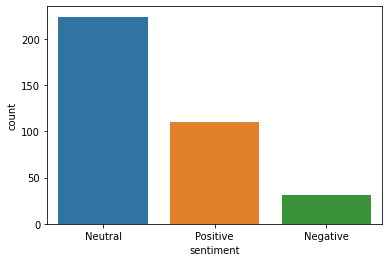

In [78]:
#Plot with searborn
import seaborn as sns
sns.countplot(df['sentiment'])

# Keyword Extraction
1.   For Positive and Negative sentiment
2.   For General



In [79]:
#Keyword Extraction
positive_tweet = df[df['sentiment'] =='Positive']['clean_contentss']

In [81]:
negative_tweet = df[df['sentiment']=='Negative']['clean_contentss']
neutral_tweet =  df[df["sentiment"]== 'Neutral']['clean_contentss']

In [82]:
positive_tweet

5       Kashmiri Wazwan Review of Mughal Darbar TripA...
9                             Images for kashmiri wazwan
13     The origin evolution of Kashmirs emblematic cu...
14     Buy online Authentic Kashmiri Wazwan Rista Gos...
15     Most authentic Kashmiri wazwan experience you ...
                             ...                        
343     The presentation and presentation of a royal ...
350     This picture has been upload for a single pur...
358                                                     
362     Loading the stomach when it has no capacity t...
365                                        All becoz of 
Name: clean_contentss, Length: 110, dtype: object

In [83]:
#Remove StopWords & Convert into Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).to_list()

In [84]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).to_list()
neutral_tweet_list  = neutral_tweet.apply(nfx.remove_stopwords).to_list()

In [85]:
positive_tweet_list

['Kashmiri Wazwan Review Mughal Darbar TripAdvisor',
 'Images kashmiri wazwan',
 'origin evolution Kashmirs emblematic cuisine',
 'Buy online Authentic Kashmiri Wazwan Rista Goshtaba',
 'authentic Kashmiri wazwan experience',
 'Tariq Kashmiri Wazwan Delhi Restaurant reviews',
 'Kashmiri Wazwan Snack Foods IndiaMART',
 'Kashmiri Wazwan famous dishes served',
 'FAMOUS KASHMIRI WAZWAN DISHES Kindle Edition',
 'Great Kashmiri Wazwan Chef Kunal Kapur',
 'chinar kashmiri wazwan Home delivery Order online',
 'Kashmiri Cuisine Wazwan little History Kashmiri Recipes',
 'Kashmiri wazwan New Indian Express',
 'Memories walimaakashmiriwazwanweddingfeast',
 'goes Kashmiri wazwan Cond Nast',
 'Kashmiri Wazwan Hyderabad Whatshot',
 'Coronashaped ShamiKebab Yemberzal Rista',
 'Kashmiri Wazwan Dishes Come Wazwan',
 'Images kashmiri wazwan',
 'origin evolution Kashmirs emblematic cuisine',
 'Buy online Authentic Kashmiri Wazwan Rista Goshtaba',
 'Kashmiri Wazwan essential dishes',
 'Tariq Kashmiri Wazwa

In [86]:
#Tokenization
for line in positive_tweet_list:
  # print line
  for token in line.split():
    print(token)

Kashmiri
Wazwan
Review
Mughal
Darbar
TripAdvisor
Images
kashmiri
wazwan
origin
evolution
Kashmirs
emblematic
cuisine
Buy
online
Authentic
Kashmiri
Wazwan
Rista
Goshtaba
authentic
Kashmiri
wazwan
experience
Tariq
Kashmiri
Wazwan
Delhi
Restaurant
reviews
Kashmiri
Wazwan
Snack
Foods
IndiaMART
Kashmiri
Wazwan
famous
dishes
served
FAMOUS
KASHMIRI
WAZWAN
DISHES
Kindle
Edition
Great
Kashmiri
Wazwan
Chef
Kunal
Kapur
chinar
kashmiri
wazwan
Home
delivery
Order
online
Kashmiri
Cuisine
Wazwan
little
History
Kashmiri
Recipes
Kashmiri
wazwan
New
Indian
Express
Memories
walimaakashmiriwazwanweddingfeast
goes
Kashmiri
wazwan
Cond
Nast
Kashmiri
Wazwan
Hyderabad
Whatshot
Coronashaped
ShamiKebab
Yemberzal
Rista
Kashmiri
Wazwan
Dishes
Come
Wazwan
Images
kashmiri
wazwan
origin
evolution
Kashmirs
emblematic
cuisine
Buy
online
Authentic
Kashmiri
Wazwan
Rista
Goshtaba
Kashmiri
Wazwan
essential
dishes
Tariq
Kashmiri
Wazwan
Delhi
Restaurant
reviews
Kashmiri
Wazwan
Snack
Foods
IndiaMART
MIRS
kashmiri
wazwan
Rest

In [87]:
pos_tokens = [token for line in positive_tweet_list for token in line.split()]

In [88]:
neg_tokens = [token for line in negative_tweet_list for token in line.split()]
neut_tokens =[token for line in neutral_tweet_list for token in line.split()]

In [89]:
pos_tokens

['Kashmiri',
 'Wazwan',
 'Review',
 'Mughal',
 'Darbar',
 'TripAdvisor',
 'Images',
 'kashmiri',
 'wazwan',
 'origin',
 'evolution',
 'Kashmirs',
 'emblematic',
 'cuisine',
 'Buy',
 'online',
 'Authentic',
 'Kashmiri',
 'Wazwan',
 'Rista',
 'Goshtaba',
 'authentic',
 'Kashmiri',
 'wazwan',
 'experience',
 'Tariq',
 'Kashmiri',
 'Wazwan',
 'Delhi',
 'Restaurant',
 'reviews',
 'Kashmiri',
 'Wazwan',
 'Snack',
 'Foods',
 'IndiaMART',
 'Kashmiri',
 'Wazwan',
 'famous',
 'dishes',
 'served',
 'FAMOUS',
 'KASHMIRI',
 'WAZWAN',
 'DISHES',
 'Kindle',
 'Edition',
 'Great',
 'Kashmiri',
 'Wazwan',
 'Chef',
 'Kunal',
 'Kapur',
 'chinar',
 'kashmiri',
 'wazwan',
 'Home',
 'delivery',
 'Order',
 'online',
 'Kashmiri',
 'Cuisine',
 'Wazwan',
 'little',
 'History',
 'Kashmiri',
 'Recipes',
 'Kashmiri',
 'wazwan',
 'New',
 'Indian',
 'Express',
 'Memories',
 'walimaakashmiriwazwanweddingfeast',
 'goes',
 'Kashmiri',
 'wazwan',
 'Cond',
 'Nast',
 'Kashmiri',
 'Wazwan',
 'Hyderabad',
 'Whatshot',
 'Coro

In [90]:
# Get Most Commonest Keywords
from collections import Counter

In [92]:
def get_tokens(docx,num=18):
  word_tokens = Counter(docx)
  most_common = word_tokens.most_common(num)
  result = dict(most_common)
  return result

In [93]:
get_tokens(pos_tokens)

{'Cuisine': 4,
 'Kashmir': 5,
 'Kashmiri': 50,
 'Order': 5,
 'Restaurant': 4,
 'Rista': 4,
 'Wazwan': 37,
 'art': 4,
 'cuisine': 4,
 'delicious': 4,
 'dish': 5,
 'food': 5,
 'kashmiri': 8,
 'mutton': 5,
 'online': 4,
 'special': 5,
 'taste': 6,
 'wazwan': 18}

In [94]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [95]:
pos_df = pd.DataFrame(most_common_pos_words.items(),columns= ['words','scores'])
pos_df

,words,scores
0,Kashmiri,50
1,Wazwan,37
2,wazwan,18
3,kashmiri,8
4,taste,6
5,Order,5
6,food,5
7,mutton,5
8,dish,5
9,special,5


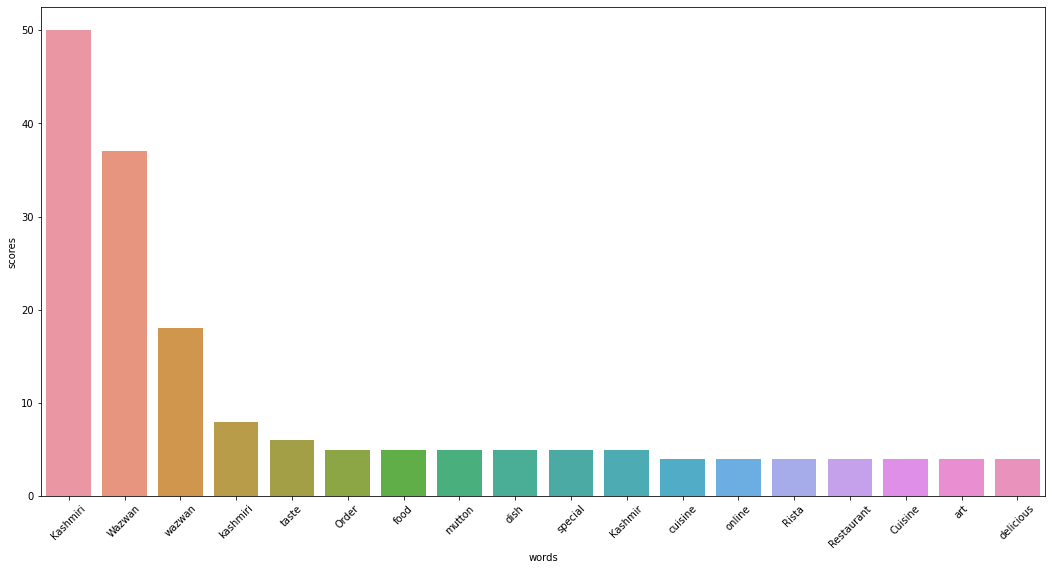

In [98]:
#Plot with seaborn
plt.figure(figsize=(18,9))
sns.barplot(x='words',y = 'scores',data= pos_df)
plt.xticks(rotation  =45)
plt.show()

In [99]:
#Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
neg_df

,words,scores
0,Wazwan,12
1,Kashmiri,11
2,#,5
3,meal,3
4,na,3
5,wazwan,3
6,Things,2
7,Learn,2
8,Relishing,2
9,Bhai,2


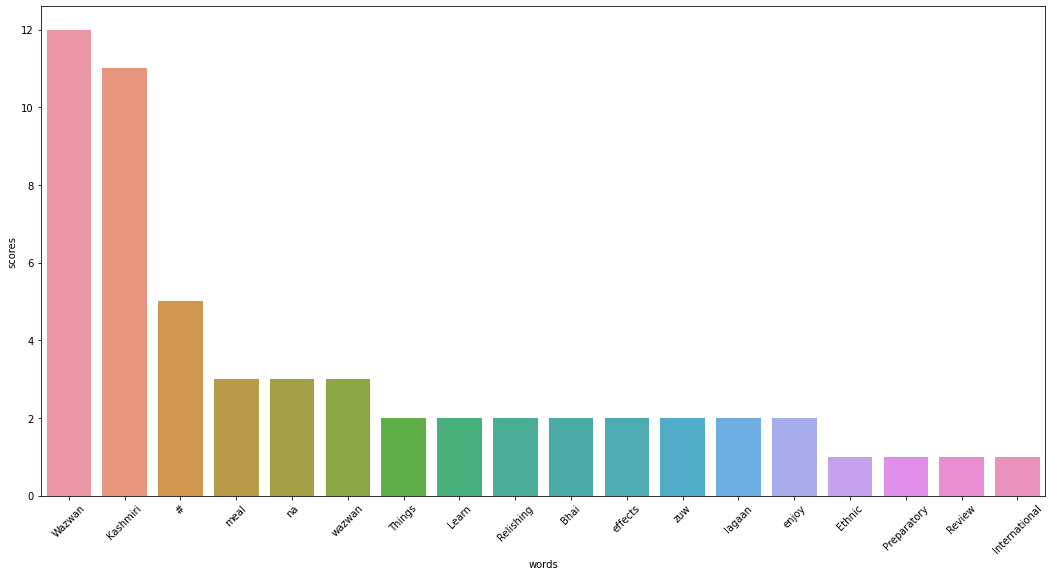

In [101]:
# Plot with sns for negative words
plt.figure(figsize=(18,9))
sns.barplot(x = 'words',y = 'scores',data =neg_df)
plt.xticks(rotation = 45)
plt.show()

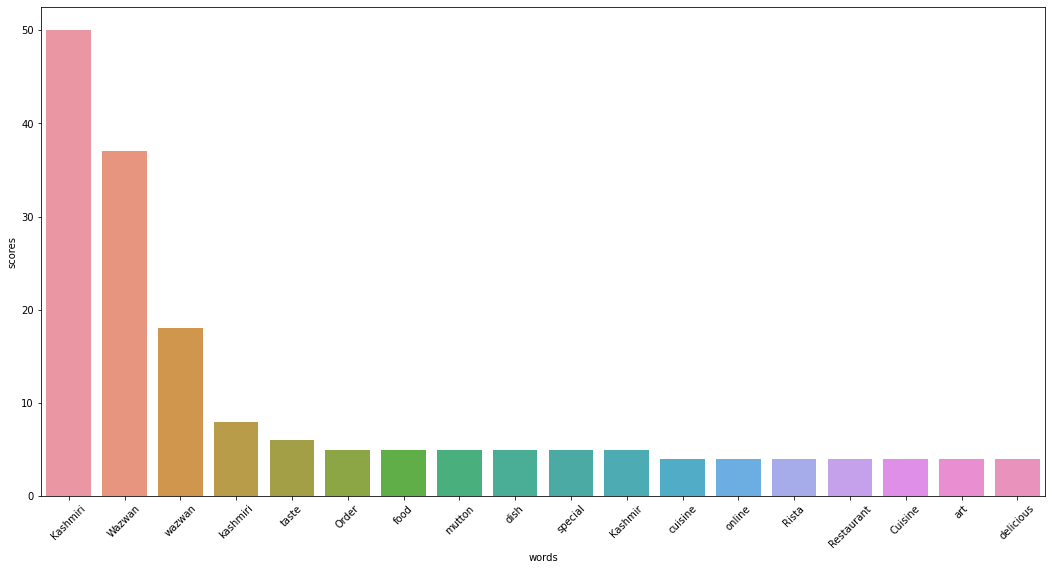

In [104]:
#Plot for neutal_df
neut_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize = (18,9))
sns.barplot(x= 'words',y = 'scores',data = neut_df)
plt.xticks(rotation = 45)
plt.show()

In [105]:
#Word Cloud
from wordcloud import WordCloud

In [106]:
from matplotlib import interactive
def word_cloud(docx):
  plt.figure(figsize =(20,10))
  mywordcloud = WordCloud().generate(docx)
  plt.imshow(mywordcloud, interpolation = 'bilinear')
  plt.axis = ('off')
  plt.show()

In [107]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neut_docx =' '.join(neut_tokens)

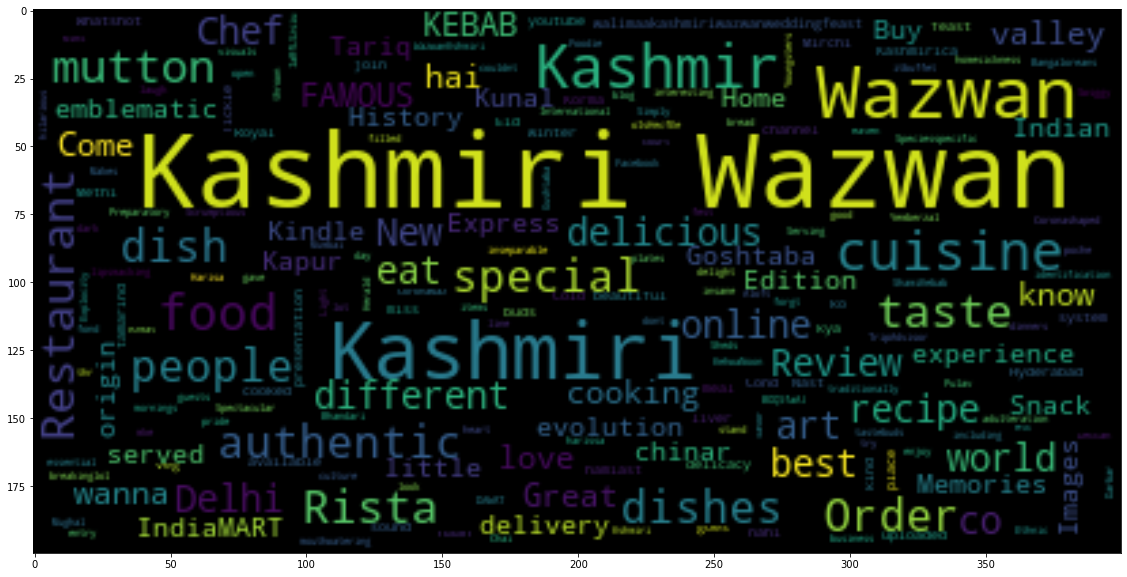

In [108]:
word_cloud(pos_docx)

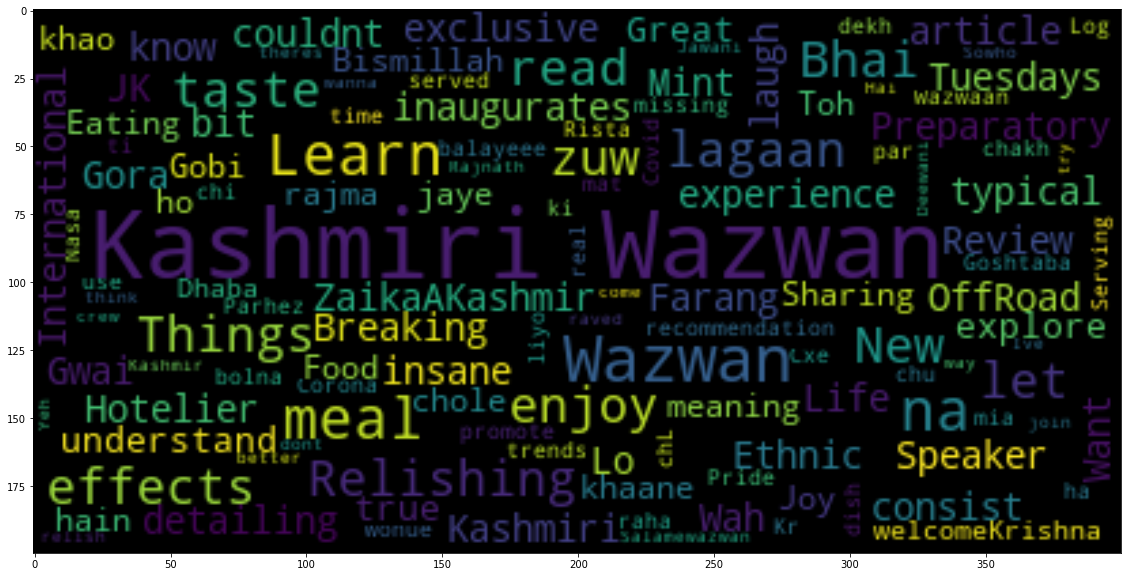

In [109]:
word_cloud(neg_docx)

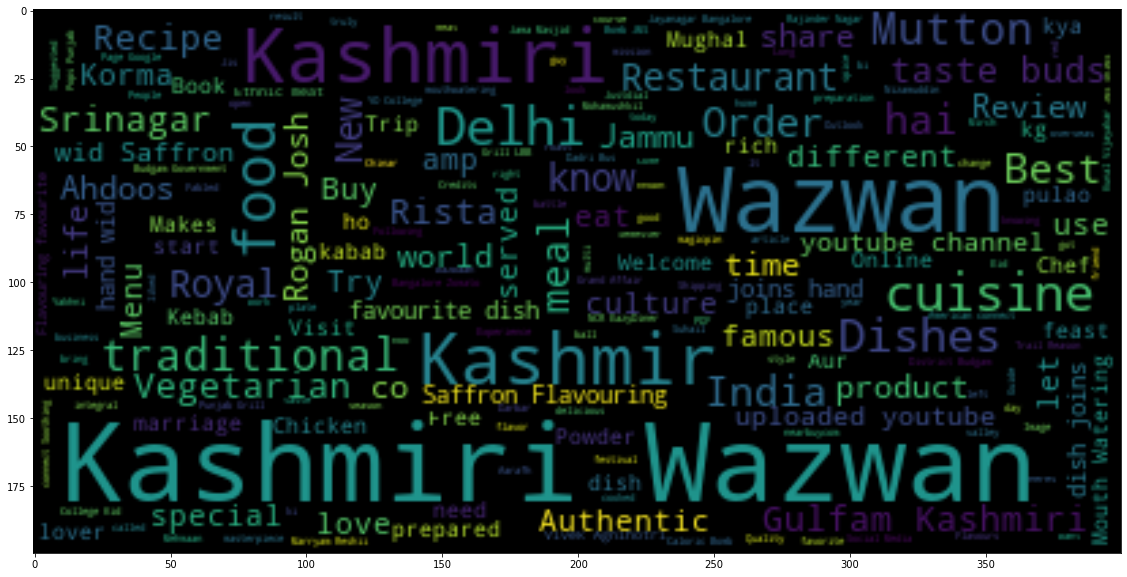

In [110]:
word_cloud(neut_docx)